In [34]:
import pandas as pd 
import numpy as np 
import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import os 
print(os.listdir('.'))

['educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv', 'plotly.ipynb', 'school_and_country_table.csv', 'cwurData.csv', 'timesData.csv', 'shanghaiData.csv', '.vscode']


In [36]:
timesData= pd.read_csv('timesData.csv')
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [38]:
import sys
print(sys.executable)

/Users/berkekincioglu/opt/anaconda3/bin/python


In [40]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [42]:
#LINE PLOT
#Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities

In [44]:
df= timesData.iloc[:100,:]
#creating trace 1
trace1=go.Scatter(
                  x=df.world_rank,
                  y=df.citations,
                  mode='lines',
                  marker=dict(color='rgba(16,122,2,0.8)'),
                  name='citations',
                  text=df.university_name)
#creating trace 2
trace2=go.Scatter(
                  x=df.world_rank,
                  y=df.teaching,
                  mode='lines+markers',
                  name='teaching',
                  marker= dict(color = 'rgba(80,26,80,0.8)'),
                  text=df.university_name
)
data=[trace1, trace2]
layout=dict(title='Citation and Teaching vs World Rank of Top  100 Universities',
             xaxis=dict(title='World Rank',ticklen=5,           zeroline=False))
fig=dict(data=data,layout=layout)
iplot(fig)

In [46]:
#SCATTER
#Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

In [48]:
df2014=timesData[timesData.year ==2014].iloc[:100,:]
df2015=timesData[timesData.year ==2015].iloc[:100,:]
df2016=timesData[timesData.year ==2016].iloc[:100,:]
trace1=go.Scatter(x=df2014.world_rank,y=df2014.citations,mode="markers",name="2014",marker={'color':'rgba(255,128,255,0.8)'},text=df2014.university_name)
trace2=go.Scatter(x=df2015.world_rank,y=df2015.citations,mode="markers",marker=dict(color="rgba(0,255,0,0.8)"),text=df2015.university_name,name="2015")
trace3=go.Scatter(x=df2016.world_rank,y=df2016.citations,name="2016",mode='markers',marker=dict(color='rgba(0,255,200,0.8)'),text=df2016.university_name)
data=[trace1,trace2,trace3]
layout=dict(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',xaxis=dict(title='World Rank',ticklen=5,zeroline=False),yaxis=dict(title='Citation',ticklen=5,zeroline=False))
fig=dict(layout=layout,data=data)
iplot(fig)

In [50]:
# Bar Charts
# First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)

In [52]:
df2014=timesData[timesData.year==2014].iloc[:3,:]
trace1=go.Bar(
    x=df2014.university_name,
    y=df2014.citations,
    name='citations',
    marker=dict(color='rgba(255,174,255,0.5)',line=dict(color='rgba(0,0,0)',width=1.5)),
    text=df2014.country)
trace2=go.Bar(
    x=df2014.university_name,
    y=df2014.teaching,
    name='teaching',
    marker=dict(color='rgba(255,255,128,0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
    text=df2014.country)
data=[trace1,trace2]
layout=go.Layout(barmode='group')
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [54]:
df2014=timesData[timesData.year==2014].iloc[:3,:]
trace1={
    'x':df2014.university_name,
    'y':df2014.citations,
    'name':'citation',
    'type':'bar'
};
trace2={
    'x':df2014.university_name,
    'y':df2014.teaching,
    'name':'teaching',
    'type':'bar'
};
data=[trace1,trace2]
layout={
    'xaxis':{'title':'Top 3 universities'},
    'barmode':'relative',
    'title':'citations and teaching of top 3 universities in 2014'
};
fig=go.Figure(data=data,layout=layout)
iplot(fig)


In [56]:
# PLOTLY IN[11] gorsellestirme calismasini yaz !

In [58]:
df2016 = timesData[timesData.year==2016].iloc[:7,:]
pie1=df2016.num_students
pie1_list = [float(i.replace(',','.')) for i in df2016.num_students]
labels=df2016.university_name
fig={
    "data":[
        {
            "values":pie1_list,
            "labels":labels,
            "domain":{"x":[0,.5]},
            "name":"Number of Students Rates",
            "hoverinfo":"label+percent+name",
            "hole":.3,
            "type":"pie"
        },
    ],
    "layout":{
            "title":"Universities Number of Students rates",
            "annotations":[
            {
                "font":{"size":20},
                "showarrow":False,
                "text":"Number of Students",
                "x":0.20,
                "y":1
            },
        ]
    }
}
iplot(fig)

In [60]:
# BUBBLE CHART
#Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [62]:
df2016=timesData[timesData.year==2016].iloc[:20,:]
df2016.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016


In [63]:
num_students_size = [float(i.replace(',','.')) for i in df2016.num_students]
international_color = [float(i) for i in df2016.international]
data = [
    {
        'x':df2016.world_rank,
        'y':df2016.teaching,
        'mode':'markers',
        'marker':{'color':international_color,'size':num_students_size,                    'showscale':True
    },
        'text':df2016.university_name
    }
       ]
iplot(data)

In [64]:
x2011= timesData.student_staff_ratio[timesData.year==2011]
x2012= timesData.student_staff_ratio[timesData.year==2012]
trace1= go.Histogram(
    x=x2011,
    opacity=0.75,
    name='2011',
    marker={'color':'rgba(171,50,96,0.6)'}
)
trace2=go.Histogram(
    x=x2012,
    opacity=0.75,
    name='2012',
    marker={'color':'rgba(12,50,196,0.6)'}
)
data=[trace1,trace2]
layout=go.Layout(barmode='overlay',
title='students staff ratio in 2011  and 2012',
xaxis={'title':'student staff ratio'},
yaxis={'title':'Count'})
fig = go.Figure(data=data ,layout=layout)
iplot(fig)

(-0.5, 511.5, 383.5, -0.5)

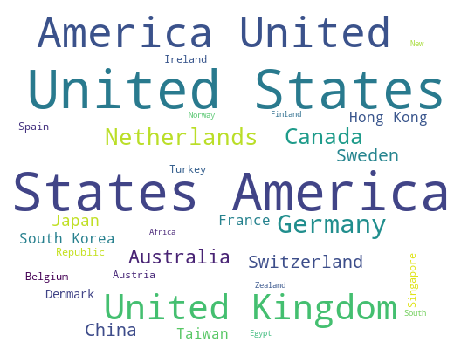

In [65]:
# WORD CLOUD
x2011 = timesData.country[timesData.year==2011]
plt.subplots(figsize=(8,8))
wordcloud=WordCloud(
    background_color='white',
    width=512,
    height=384
).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")

In [66]:
#BOX PLOTS
x2015= timesData[timesData.year == 2015].iloc[:10,:]
trace0 = go.Box(
    y=x2015.total_score,
    name='total score of universities',
    marker={'color':'rgb(12,12,140)'}
)
trace1= go.Box(
    y=x2015.research,
    name='research of universities',
    marker={'color':'rgb(12,128,128)'}
)
data=[trace0,trace1]
iplot(data)

In [67]:
#SCATTER MATRIX PLOTS
import plotly.figure_factory as ff
dataFrame = timesData[timesData.year==2015]
data2015= dataFrame.loc[:,['research','international','total_score']]
data2015['index']= np.arange(1,len(data2015)+1)
#
fig = ff.create_scatterplotmatrix(data2015,diag='box',index='index',colormap='Portland',colormap_type='cat',height=700,width=700)
iplot(fig)

In [68]:
#INSET PLOTS
trace1= go.Scatter(
    x=dataFrame.world_rank,
    y=dataFrame.teaching,
    name='teaching',
    marker={'color':'rgba(16,112,2,0.8)'}
)
trace2=go.Scatter(
    x=dataFrame.world_rank,
    y=dataFrame.income,
    xaxis='x2',
    yaxis='y2',
    name='income',
    marker={'color':'rgba(160,112,20,0.8)'}
)
data=[trace1,trace2]
layout=go.Layout(
    xaxis2=dict(domain=[0.6,0.95],anchor='y2'),
    yaxis2=dict(domain=[0.6,0.95],anchor='x2'),
    title='Income and Teaching vs World Rank of Universities'
)
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [69]:
#3D SCATTER
trace1=go.Scatter3d(
    x=dataFrame.world_rank,
    y=dataFrame.research,
    z=dataFrame.citations,
    mode='markers',
    marker=dict(size=10,color='rgba(255,0,0)')
)
data=[trace1]
layout=go.Layout(margin=dict(l=0,r=0,b=0,t=0))
fig= go.Figure(data=data,layout=layout)
iplot(fig)

In [70]:
#MULTIPLE SUBPLOTS
trace1=go.Scatter(
    x=dataFrame.world_rank,
    y=dataFrame.research,
    name='research'
)
trace2=go.Scatter(
    x=dataFrame.world_rank,
    y=dataFrame.citations,
    xaxis='x2',
    yaxis='y2',
    name='citations'
)
trace3=go.Scatter(
    x=dataFrame.world_rank,
    y=dataFrame.income,
    xaxis='x3',
    yaxis='y3',
    name='income'
)
trace4=go.Scatter(
    x=dataFrame.world_rank,
    y=dataFrame.total_score,
    xaxis='x4',
    yaxis='y4',
    name='total_score'
)
data=[trace1,trace2,trace3,trace4]
layout=go.Layout(
    xaxis=dict(domain=[0,0.45]),
    yaxis=dict(domain=[0,0.45]),
    xaxis2=dict(domain=[0.55,1],anchor='y2'),
    yaxis2=dict(domain=[0,0.45],anchor='x2'),
    xaxis3=dict(domain=[0,0.45],anchor='y3'),
    yaxis3=dict(domain=[0.55,1],anchor='x3'),
    xaxis4=dict(domain=[0.55,1],anchor='y4'),
    yaxis4=dict(domain=[0.55,1],anchor='x4'),
    title='Research,citation,income,and total score VS World Rank of Universities'
)
fig=go.Figure(layout=layout,data=data)
iplot(fig)
